# Introduction

This Data Science challenge is designed to analyze the December 2016 data for New York City Taxi and Limousine Commission Green Taxis.Here is the data source link:https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page. EDA and day/hourly trip analysis done based on the available data. To identify what kind of trips yield better tip amount for the taxi drivers, Machine learning models have been applied and evaulated to identify the most important features. Additionaly anomaly detection identified on data pattern with vizualization.

In [107]:
#import python libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, skew
from math import trunc
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [373]:
#Read the csv file an load data in dataframe
green_tx=pd.read_csv('green_tripdata_2016-12.csv')

In [318]:
#Check the csv data
green_tx.head(10)

VendorID lpep_pickup_datetime  \
2 2016-12-01 00:00:54  2016-12-01 00:06:54                    N   
  2016-12-01 00:52:41  2016-12-01 00:54:51                    N   
  2016-12-01 00:10:39  2016-12-01 00:14:47                    N   
  2016-12-01 00:12:16  2016-12-01 00:15:31                    N   
  2016-12-01 00:29:22  2016-12-01 00:39:51                    N   
  2016-12-01 00:42:02  2016-12-01 00:52:19                    N   
  2016-12-01 00:16:59  2016-12-01 00:21:03                    N   
  2016-12-01 00:48:04  2016-12-01 00:59:40                    N   
  2016-12-01 00:04:23  2016-12-01 00:06:43                    N   
  2016-12-01 00:34:43  2016-12-01 00:54:09                    N   

                       lpep_dropoff_datetime  store_and_fwd_flag  RatecodeID  \
2 2016-12-01 00:00:54                      1                  92         192   
  2016-12-01 00:52:41                      1                  92         171   
  2016-12-01 00:10:39                      1                  75         238   
  2016-12-01 00:12:16                      1                 166         151   
  2016-12-01 00:29:22                      1                 166          42   
  2016-12-01 00:42:02                      1                  42         151   
  2016-12-01 00:16:59                      1                 179         179   
  2016-12-01 00:48:04                      1                 179         129   
  2016-12-01 00:04:23                      1                  82          82   
  2016-12-01 00:34:43                      1                  85          77   

                       PULocationID  DOLocationID  passenger_count  \
2 2016-12-01 00:00:54             1          1.29              6.5   
  2016-12-01 00:52:41             1          0.64              4.0   
  2016-12-01 00:10:39             2          0.89              5.5   
  2016-12-01 00:12:16             1          0.66              4.5   
  2016-12-01 00:29:22             1          2.15              9.5   
  2016-12-01 00:42:02             1          2.82             11.0   
  2016-12-01 00:16:59             1          0.68              5.0   
  2016-12-01 00:48:04             1          2.62             11.5   
  2016-12-01 00:04:23             1          0.52              4.0   
  2016-12-01 00:34:43             1          4.63             17.0   

                       trip_distance  fare_amount  extra  mta_tax  tip_amount  \
2 2016-12-01 00:00:54            0.5          0.5   0.00      0.0         NaN   
  2016-12-01 00:52:41            0.5          0.5   1.06      0.0         NaN   
  2016-12-01 00:10:39            0.5          0.5   1.70      0.0         NaN   
  2016-12-01 00:12:16            0.5          0.5   1.74      0.0         NaN   
  2016-12-01 00:29:22            0.5          0.5   2.16      0.0         NaN   
  2016-12-01 00:42:02            0.5          0.5   0.00      0.0         NaN   
  2016-12-01 00:16:59            0.5          0.5   0.00      0.0         NaN   
  2016-12-01 00:48:04            0.5          0.5   0.00      0.0         NaN   
  2016-12-01 00:04:23            0.5          0.5   0.00      0.0         NaN   
  2016-12-01 00:34:43            0.5          0.5   0.00      0.0         NaN   

                       tolls_amount  ehail_fee  improvement_surcharge  \
2 2016-12-01 00:00:54           0.3       7.80                      2   
  2016-12-01 00:52:41           0.3       6.36                      1   
  2016-12-01 00:10:39           0.3       8.50                      1   
  2016-12-01 00:12:16           0.3       7.54                      1   
  2016-12-01 00:29:22           0.3      12.96                      1   
  2016-12-01 00:42:02           0.3      12.30                      1   
  2016-12-01 00:16:59           0.3       6.30                      2   
  2016-12-01 00:48:04           0.3      12.80                      2   
  2016-12-01 00:04:23           0.3       5.30                      2   
  2016-12-01 00:34:43 

In [19]:
# Check the columns of the dataframe
green_tx.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [21]:
# Check the index of the dataframe
green_tx.index

MultiIndex([(2, '2016-12-01 00:00:54'),
            (2, '2016-12-01 00:52:41'),
            (2, '2016-12-01 00:10:39'),
            (2, '2016-12-01 00:12:16'),
            (2, '2016-12-01 00:29:22'),
            (2, '2016-12-01 00:42:02'),
            (2, '2016-12-01 00:16:59'),
            (2, '2016-12-01 00:48:04'),
            (2, '2016-12-01 00:04:23'),
            (2, '2016-12-01 00:34:43'),
            ...
            (1, '2016-12-31 23:00:36'),
            (1, '2016-12-31 23:00:35'),
            (1, '2016-12-31 23:00:31'),
            (1, '2016-12-31 23:00:22'),
            (1, '2016-12-31 23:00:22'),
            (1, '2016-12-31 23:00:16'),
            (1, '2016-12-31 23:00:20'),
            (1, '2016-12-31 23:00:08'),
            (1, '2016-12-31 23:00:00'),
            (1, '2016-12-31 23:00:10')],
           length=1224158)

Multiindex found which needs to be reset to access all column data properly

In [22]:
green_tx.dtypes

VendorID                  object
lpep_pickup_datetime      object
lpep_dropoff_datetime      int64
store_and_fwd_flag         int64
RatecodeID                 int64
PULocationID               int64
DOLocationID             float64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge      int64
total_amount               int64
payment_type             float64
trip_type                float64
dtype: object

In [319]:
#Check the shape of the dataset
green_tx.shape

(1224158, 19)

In [374]:
# resetting index to have the original index to remove multiindex and column names rearanged accordingly
green_tx = green_tx.reset_index()
green_tx = green_tx.iloc[:,:19]
green_tx.columns = ['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','store_and_fwd_flag','RatecodeID','PULocationID',
                   'DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                   'ehail_fee','improvement_surcharge','total_amount','payment_type','trip_type']

In [377]:
# Check the dataset
green_tx.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,NaN,0.3,8.50,1,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1,1


The dataset contain 1.22M records with 19 features

In [28]:
#Check the datatypes of the columns
green_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224158 entries, 0 to 1224157
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1224158 non-null  int64  
 1   lpep_pickup_datetime   1224158 non-null  object 
 2   lpep_dropoff_datetime  1224158 non-null  object 
 3   store_and_fwd_flag     1224158 non-null  object 
 4   RatecodeID             1224158 non-null  int64  
 5   PULocationID           1224158 non-null  int64  
 6   DOLocationID           1224158 non-null  int64  
 7   passenger_count        1224158 non-null  int64  
 8   trip_distance          1224158 non-null  float64
 9   fare_amount            1224158 non-null  float64
 10  extra                  1224158 non-null  float64
 11  mta_tax                1224158 non-null  float64
 12  tip_amount             1224158 non-null  float64
 13  tolls_amount           1224158 non-null  float64
 14  ehail_fee         

Some observations based on dataset:

 1.vendor_id is nominal
 2. The column store_and_fwd_flag is categorical
 3.The columns pickup_datetime and dropoff_datetime are stored as object which needs be converted to datetime for analysis.

In [29]:
# Analyzing the  statistics of numeric columns
green_tx.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,0.0,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06
mean,1.799278e+00,1.085079e+00,1.131729e+02,1.290862e+02,1.362447e+00,2.618179e+00,1.159368e+01,3.629562e-01,4.872578e-01,1.128787e+00,9.456725e-02,NaN,2.925184e-01,1.399902e+01,1.534862e+00,1.019722e+00
std,4.005404e-01,5.660195e-01,7.628387e+01,7.723367e+01,1.036924e+00,2.806160e+00,9.793499e+00,3.901575e-01,8.517500e-02,2.216306e+00,8.808537e-01,NaN,5.072935e-02,1.112872e+01,5.240995e-01,1.390438e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.056000e+01,-8.540000e+00,NaN,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,9.800000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.300000e+01,1.290000e+02,1.000000e+00,1.700000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.730000e+02,1.930000e+02,1.000000e+00,3.200000e+00,1.400000e+01,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,NaN,3.000000e-01,1.656000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,1.475000e+02,1.007000e+03,4.500000e+00,5.000000e-01,2.507000e+02,2.979800e+02,NaN,3.000000e-01,1.008300e+03,5.000000e+00,2.000000e+00


The above table gives certain insights like:

1. Except ehain_fee, no feature has missing data.
2.The passenger count varies between 0 to 9, wuth an avergage count of 1-2 passengers.
3. The average trip distance looks like 2 - 3 miles.
4. The average tip amount comes like $2 - $3.

In [378]:
#Converting pick up and drop_off features to datetime 
green_tx['lpep_pickup_datetime']=pd.to_datetime(green_tx['lpep_pickup_datetime'])
green_tx['lpep_dropoff_datetime']=pd.to_datetime(green_tx['lpep_dropoff_datetime'])

In [379]:
# New column trip_duration added calculating the difference between drop-off and pick-up time and coverting to seconds
green_tx['trip_duration']= green_tx['lpep_dropoff_datetime'] - green_tx['lpep_pickup_datetime']
green_tx['trip_duration'] = pd.to_timedelta(green_tx['trip_duration']).dt.total_seconds()
green_tx['trip_duration']=green_tx['trip_duration'].astype(int)

In [327]:
green_tx.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1,360.0
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1,1,130.0
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,NaN,0.3,8.50,1,1,248.0
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1,1,195.0
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1,1,629.0
5,2,2016-12-01 00:42:02,2016-12-01 00:52:19,N,1,42,151,1,2.82,11.0,0.5,0.5,0.00,0.0,NaN,0.3,12.30,1,1,617.0
6,2,2016-12-01 00:16:59,2016-12-01 00:21:03,N,1,179,179,1,0.68,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1,244.0
7,2,2016-12-01 00:48:04,2016-12-01 00:59:40,N,1,179,129,1,2.62,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1,696.0
8,2,2016-12-01 00:04:23,2016-12-01 00:06:43,N,1,82,82,1,0.52,4.0,0.5,0.5,0.00,0.0,NaN,0.3,5.30,2,1,140.0
9,2,2016-12-01 00:34:43,2016-12-01 00:54:09,N,1,85,77,1,4.63,17.0,0.5,0.5,0.00,0.0,NaN,0.3,18.30,2,1,1166.0


# Explore and visualize the data

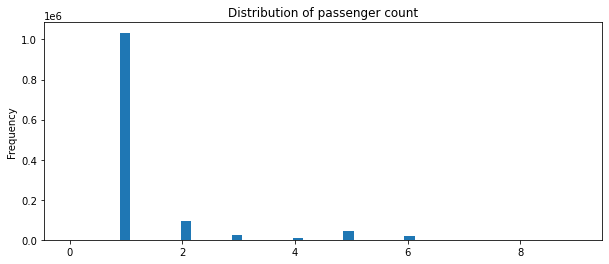

In [328]:
# Passenger count distribution
green_tx['passenger_count'].plot(kind='hist', figsize = (10,4), bins =50, title='Distribution of passenger count')

The vizualization shows average 1-2 persons are mostly passenger counts.Large group of people traveling is not very often.

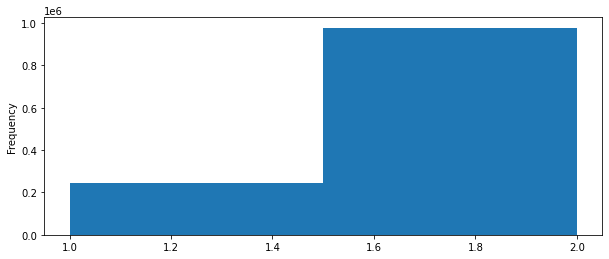

In [329]:
#Distribution of vendor id
green_tx['VendorID'].plot(kind='hist', figsize = (10,4), bins =2)

The vizualization shows count of Vendor 2 trip is much higher than Vendor 1

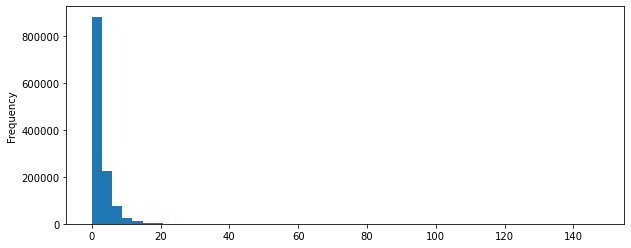

In [330]:
# trip distance distribution
green_tx['trip_distance'].plot(kind='hist', figsize = (10,4), bins =50)

The trip distance mainly varies from 0 - 20 miles whereas mostly traveled distance is 2 - 3 miles.

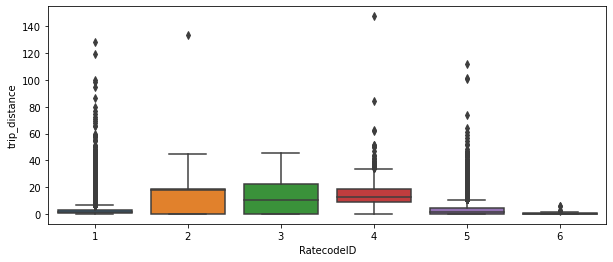

In [331]:
# trip distance vs RatecodeID distribution
plt.figure(figsize = ((10, 4)))
sns.boxplot(x='RatecodeID', y='trip_distance', data=green_tx)

Interestingly there are many outliers in standard fair and negotiated fair category

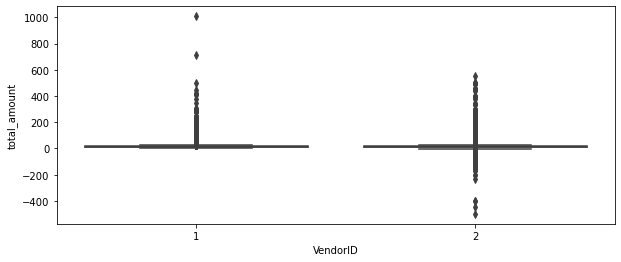

In [332]:
# trip distance vs RatecodeID distribution
plt.figure(figsize = ((10, 4)))
sns.boxplot(x='VendorID', y='total_amount', data=green_tx)

Comparing Vendor 1 and 2, it's observed that total amount is fair for Vendor 1 whereas there are several negative amounts exist for vendor 2 which are not realistic.

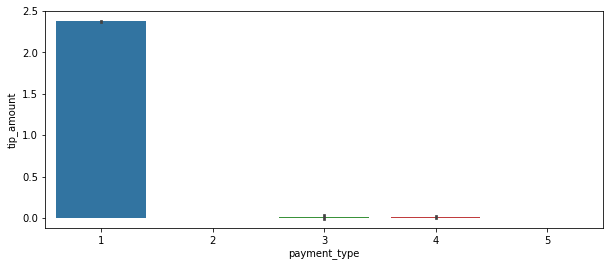

In [333]:
# payment_type vs tip_amount distribution
plt.figure(figsize = ((10, 4)))
sns.barplot(x='payment_type', y='tip_amount', data=green_tx)


As expected, in this dataset mainly the credit card tip amounts are availble as cash tip_amounts are not captured.

Text(0.5, 1.0, 'The distribution of Pick up Location ID')

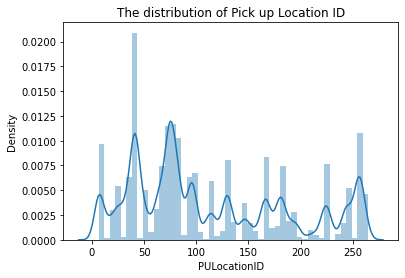

In [334]:
# Distribution of pickup taxi zone
sns.distplot(green_tx['PULocationID'])
plt.title('The distribution of Pick up Location ID')

Text(0.5, 1.0, 'The distribution of drop-off  Location ID')

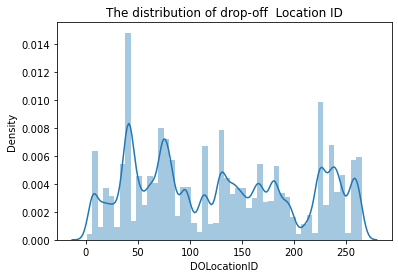

In [41]:
# Distribution of dropoff taxi zone
sns.distplot(green_tx['DOLocationID'])
plt.title('The distribution of drop-off  Location ID')

The distribution of taxi zone for pickup and dropoff looks almost similar.

Text(0.5, 1.0, 'The distribution of tip amount')

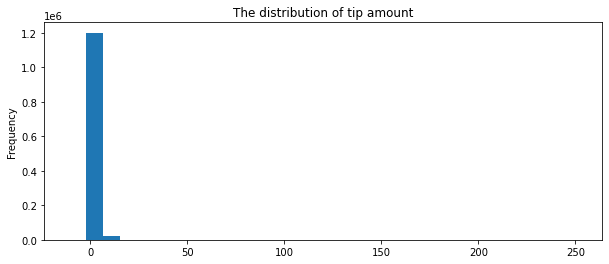

In [44]:
#Distribution of tip amount
green_tx['tip_amount'].plot(kind='hist', figsize = (10,4), bins =30)
plt.title('The distribution of tip amount')

The highest distribution of tip amount is between $2-$3. However, the negative distribution of tip amount looks like a bad quality of data where data collection made wrongly. Will look in detail in time of modeling as this may cause performance impact on the models.

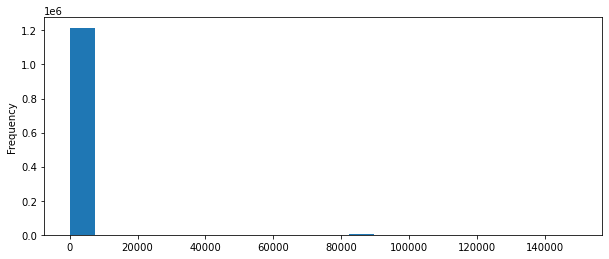

In [163]:
# Distribution of trip duration
green_tx['trip_duration'].plot(kind='hist', figsize = (10,4), bins =20)

# Day and Hourly Analysis

In [382]:
# Converting the dates into days of week to check the pattern
green_tx['pickup_day']=green_tx['lpep_pickup_datetime'].dt.day_name()
green_tx['dropoff_day']=green_tx['lpep_dropoff_datetime'].dt.day_name()

In [80]:
green_tx.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour
49075,2,2016-12-02 09:58:10,2016-12-02 10:09:18,N,1,134,121,1,2.24,10.0,...,NaN,0.3,10.8,2,1,668.00,Friday,Friday,9,10
347623,2,2016-12-09 16:12:34,2016-12-09 16:23:03,N,1,95,135,5,2.06,9.5,...,NaN,0.3,11.3,2,1,629.00,Friday,Friday,16,16
865838,2,2016-12-21 19:20:11,2016-12-21 19:29:05,N,1,7,193,5,1.56,8.0,...,NaN,0.3,9.8,2,1,534.00,Wednesday,Wednesday,19,19
568570,1,2016-12-14 21:34:48,2016-12-14 21:42:31,N,1,255,34,1,2.00,8.0,...,NaN,0.3,9.8,2,1,463.00,Wednesday,Wednesday,21,21
616637,1,2016-12-15 22:01:43,2016-12-15 22:11:41,N,1,74,42,3,2.00,9.0,...,NaN,0.3,10.3,2,1,598.00,Thursday,Thursday,22,22


In [383]:
# Checking the distribution on wk days on pick_up
green_tx['pickup_day'].value_counts()

Saturday     238159
Friday       227620
Thursday     197583
Sunday       149206
Wednesday    144582
Tuesday      138579
Monday       128429
Name: pickup_day, dtype: int64

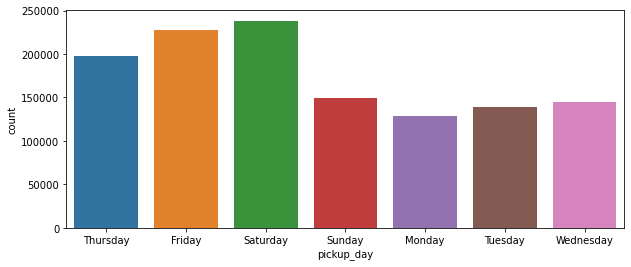

In [73]:
# Vizualization of pickup day distribution
plt.figure(figsize = ((10, 4)))
sns.countplot(x='pickup_day', data=green_tx)

In [384]:
# Checking the distribution on wk days on drop-off
green_tx['dropoff_day'].value_counts()

Saturday     237749
Friday       226322
Thursday     196608
Sunday       151827
Wednesday    144378
Tuesday      138364
Monday       128910
Name: dropoff_day, dtype: int64

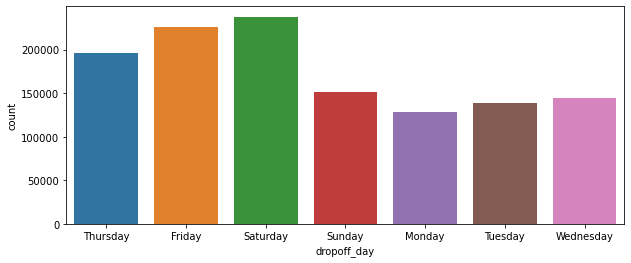

In [75]:
# Vizualization of pickup day distribution
plt.figure(figsize = ((10, 4)))
sns.countplot(x='dropoff_day', data=green_tx)

The analysis reveals that the most trips happened on Saturday and Friday, whereas least trips happened on Monday.

In [385]:
# # Converting the days into hours to check the pattern
green_tx['pickup_hour']=green_tx['lpep_pickup_datetime'].dt.hour
green_tx['dropoff_hour']=green_tx['lpep_dropoff_datetime'].dt.hour

Text(0.5, 1.0, 'Distribution of dropoff hours')

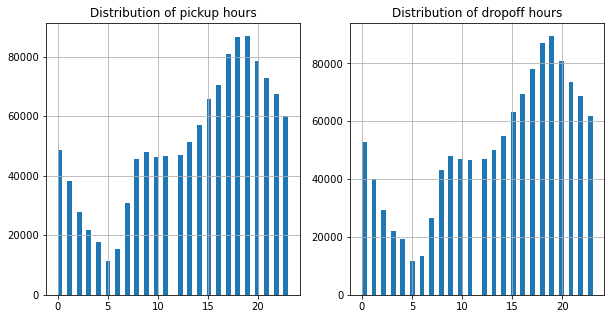

In [77]:
# Vizualization of hourly distribution of pickup and drop-off
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
green_tx.pickup_hour.hist(bins=48,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
green_tx.dropoff_hour.hist(bins=48,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

Both the distributions are almost similar and it's observed that most pickup and dropoff ocuur in the evening. Least pickup and drop-off occur in the morning.

Text(0.5, 1.0, 'The Average Trip Distance per Dropoff Day of the week')

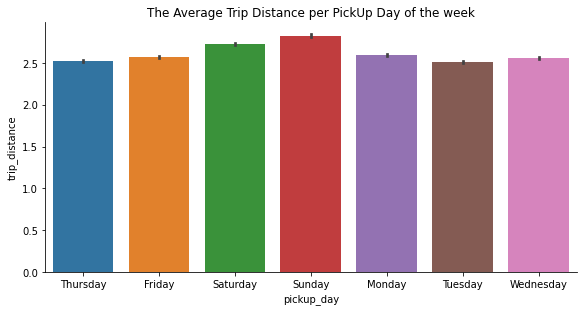

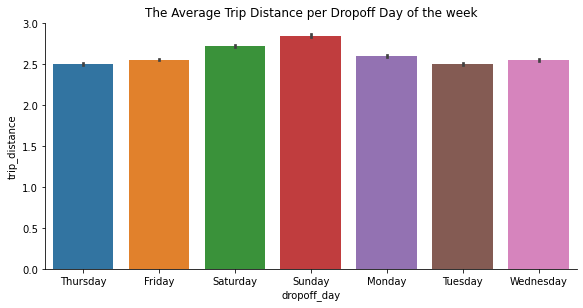

In [103]:
sns.catplot(x="pickup_day",y="trip_distance",kind="bar",data=green_tx,height=4,aspect=2)
plt.title('The Average Trip Distance per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_distance",kind="bar",data=green_tx,height=4,aspect=2)
plt.title('The Average Trip Distance per Dropoff Day of the week')

The barcharts describes the average trip distance for each day of week. Sunday is the largest as per visualization

<Figure size 1440x360 with 0 Axes>

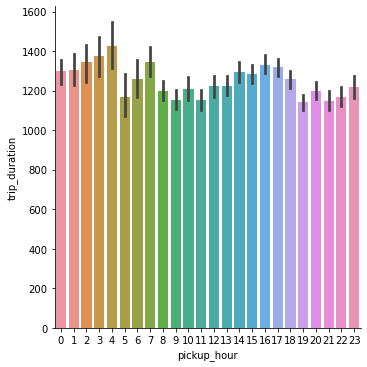

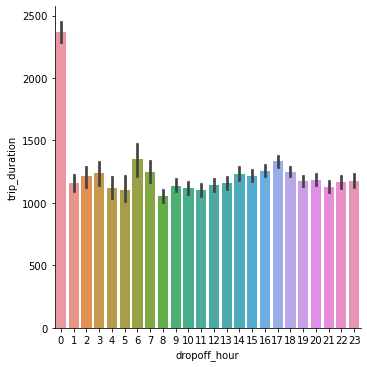

In [166]:
plt.figure(figsize = ((20, 5)))

ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=green_tx,ax=ax1)

ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=green_tx,ax=ax2)
plt.show()

The highest average trip duration are the trips started in midday whereas least trip duration are for trips which ended in very early morning.

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

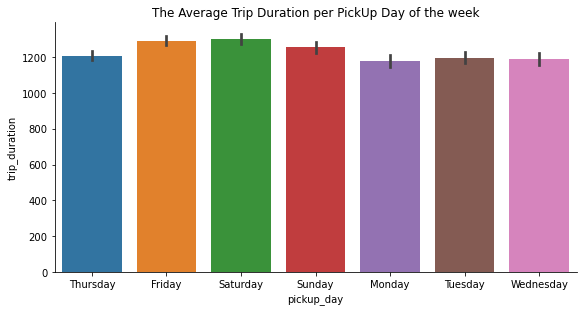

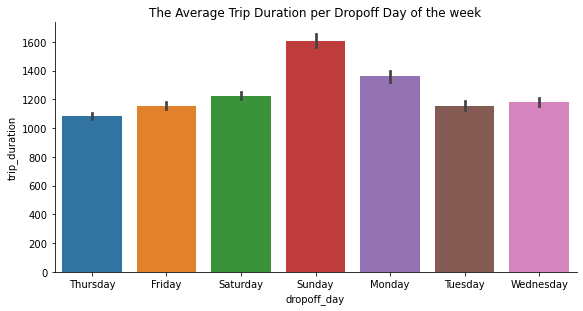

In [168]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=green_tx,height=4,aspect=2)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=green_tx,height=4,aspect=2)
plt.title('The Average Trip Duration per Dropoff Day of the week')

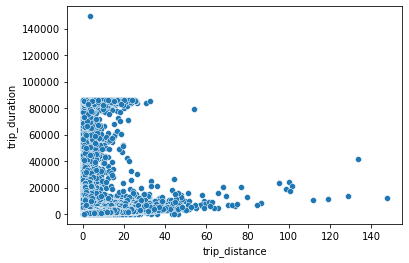

In [169]:
# Trip distance vs trip duration scatter plot
sns.scatterplot(x='trip_distance',y='trip_duration',data=green_tx)

The visualization reveals the range of trip distance mostly from 0 to 60 miles, where the mostly occur trip distance are 2 -15 miles. The trip duration also comes in the range of 0 - 90000 sec. Some outliers needs to be removed as those seems to be irrelevant and wrongly collected. Interesting fact is that for some distances like 10 miles, data is showing it took 80000 sec which seems not to be realistic. This type of bad data quality can impact the model performance.

# Machine Learning Model

The taxi drivers want to know what kind of trips yield better tips. If we need to build a model on this context, tip amount will be the target. the predictors need to be analyzed based on different ML algorithm performances.

### Data Pre-Processing

One point to be highlighted is that the tip amount availble in this data set are only the Credit card tips. As mentioned in data dictionary, cash tip amounts are not included. So our model data needs to be filtered only for the trips where credit cards used, otherwise there will be chance for data leakage.Payment type feature can be used to identify those records.

In [386]:
# Filtering to get the credit-card trips only
green_tx = green_tx[green_tx.payment_type == 1]

In [387]:
# Check the size of the current data
green_tx.shape

(581835, 24)

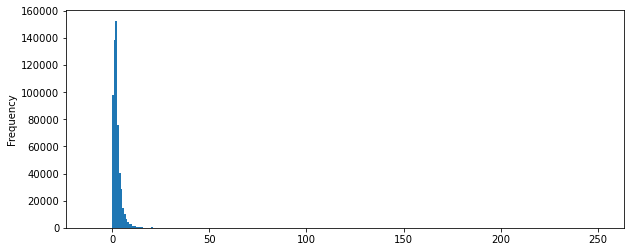

In [388]:
# Check the frequency distribution of tip amount
green_tx['tip_amount'].plot(kind='hist', figsize = (10,4), bins =300)

In [207]:
#Checking skewness and kurtosis of target
print("Skewness: %f" % green_tx['tip_amount'].skew())
print("Kurtosis: %f" % green_tx['tip_amount'].kurt())

Skewness: 14.465852
Kurtosis: 692.855447


The target is highly right skewed and we may need to apply log transformation on target value

In [405]:
# As right skewness observed, applying log transformation on target value
Y_tip = np.log1p(green_tx['tip_amount'])

In [406]:
# Storing original tip amount value as well
Y_tip_orig=green_tx['tip_amount']

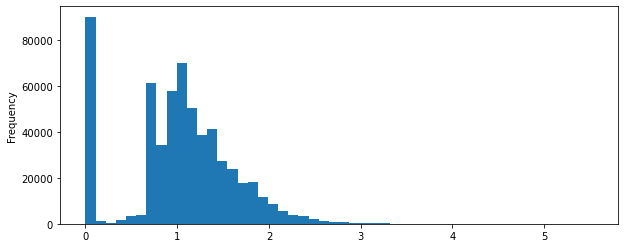

In [407]:
# Check the frequency distribution of tip amount
Y_tip.plot(kind='hist', figsize = (10,4), bins =50)

In [393]:
#Checking skewness and kurtosis of target
print("Skewness: %f" % Y_tip.skew())
print("Kurtosis: %f" % Y_tip.kurt())

Skewness: -0.000549
Kurtosis: 0.354319


The log transformation of the target value will not really help as it's not a nirmal distribution due to left side sharp hight.

In [412]:
#Y_tip = Y_tip.map('{:,.2f}'.format)

In [347]:
# Missing data checking
Total = green_tx.isnull().sum().sort_values(ascending=False)
percent = (green_tx.isnull().sum() / green_tx.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
ehail_fee,581835,1.0
dropoff_hour,0,0.0
extra,0,0.0
lpep_pickup_datetime,0,0.0
lpep_dropoff_datetime,0,0.0
store_and_fwd_flag,0,0.0
RatecodeID,0,0.0
PULocationID,0,0.0
DOLocationID,0,0.0
passenger_count,0,0.0


No Data is missing except ehail_fee column. As 100% data is missing here, we can drop this column

In [414]:
#drop significantly missing values
green_tx.drop(['ehail_fee','payment_type'], axis=1, inplace=True)

In [349]:
# Correlation analysis for tip amount
corrMatrix = green_tx.corr()
corrMatrix

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,trip_duration,pickup_hour,dropoff_hour
VendorID,1.000000,0.021197,0.010105,0.005535,0.089941,-0.012368,-0.015170,-0.002928,-0.019976,-0.015129,-0.006434,-0.014845,-0.013795,0.021722,0.033163,0.007428,0.005458
RatecodeID,0.021197,1.000000,0.047384,0.007553,-0.007534,0.024008,0.240224,-0.115548,-0.948705,0.048481,0.073708,-0.918777,0.207071,0.965069,0.005422,-0.032634,-0.032237
PULocationID,0.010105,0.047384,1.000000,0.115796,0.017805,0.046050,0.038883,0.034891,-0.050845,0.032825,0.015614,-0.051030,0.041684,0.047078,0.004178,-0.041547,-0.048380
DOLocationID,0.005535,0.007553,0.115796,1.000000,0.001737,0.077875,0.068595,-0.024131,-0.004218,0.050228,0.007514,-0.011194,0.068112,0.006323,0.009875,-0.008767,-0.005199
passenger_count,0.089941,-0.007534,0.017805,0.001737,1.000000,0.004571,0.012379,0.013973,0.008922,0.005548,-0.002077,0.009820,0.012423,-0.006820,0.005865,0.002513,0.001064
trip_distance,-0.012368,0.024008,0.046050,0.077875,0.004571,1.000000,0.849055,-0.029214,0.007278,0.515898,0.344512,0.035358,0.858683,-0.034194,0.094999,-0.075144,-0.074505
fare_amount,-0.015170,0.240224,0.038883,0.068595,0.012379,0.849055,1.000000,-0.052323,-0.206742,0.499567,0.295874,-0.168376,0.975988,0.186669,0.097056,-0.055679,-0.050967
extra,-0.002928,-0.115548,0.034891,-0.024131,0.013973,-0.029214,-0.052323,1.000000,0.125411,0.003189,-0.014903,0.122609,-0.013865,-0.122974,-0.000494,0.290111,0.274971
mta_tax,-0.019976,-0.948705,-0.050845,-0.004218,0.008922,0.007278,-0.206742,0.125411,1.000000,-0.029901,-0.067510,0.945611,-0.173570,-0.949487,-0.003123,0.032024,0.031734
tip_amount,-0.015129,0.048481,0.032825,0.050228,0.005548,0.515898,0.499567,0.003189,-0.029901,1.000000,0.236958,-0.006481,0.659944,0.012444,0.041574,-0.025620,-0.022054


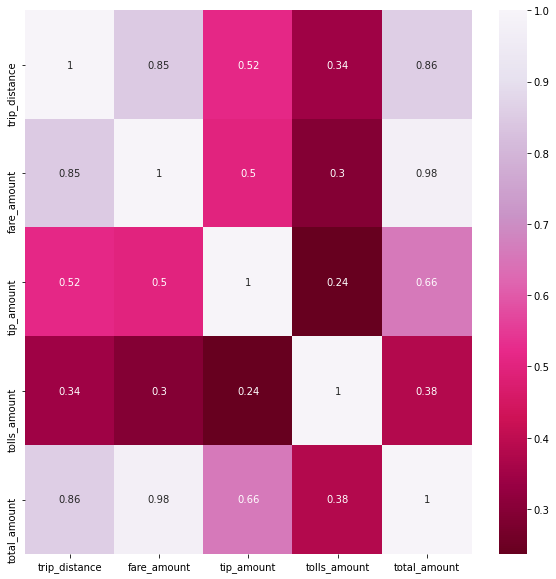

In [350]:
# Showing correlation using heatmap for highest correlated features
highest_corr_features = corrMatrix.index[abs(corrMatrix["tip_amount"])>.1]
plt.figure(figsize=(10,10))
g = sns.heatmap(green_tx[highest_corr_features].corr(),annot=True,cmap="PuRd_r")

Here are the important predictors which are highly correlated with tip amount

In [351]:
# Checking the highly correlated features with SalePrice column
corrList = corrMatrix['tip_amount'].sort_values(ascending = False)
corrList

tip_amount               1.000000
total_amount             0.659944
trip_distance            0.515898
fare_amount              0.499567
tolls_amount             0.236958
DOLocationID             0.050228
RatecodeID               0.048481
trip_duration            0.041574
PULocationID             0.032825
trip_type                0.012444
passenger_count          0.005548
extra                    0.003189
improvement_surcharge   -0.006481
VendorID                -0.015129
dropoff_hour            -0.022054
pickup_hour             -0.025620
mta_tax                 -0.029901
Name: tip_amount, dtype: float64

In [415]:
# We can remove the fields which are having less than 0% correlation with tip amount
green_tx.drop(['improvement_surcharge','VendorID','dropoff_hour','pickup_hour','mta_tax'], axis=1, inplace=True)

In [416]:
#Dropping Datetime columns as we have convered all required data in different columns. 
green_tx.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'], axis=1, inplace=True)

In [354]:
#Check the available columns
green_tx.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_type',
       'trip_duration', 'pickup_day', 'dropoff_day'],
      dtype='object')

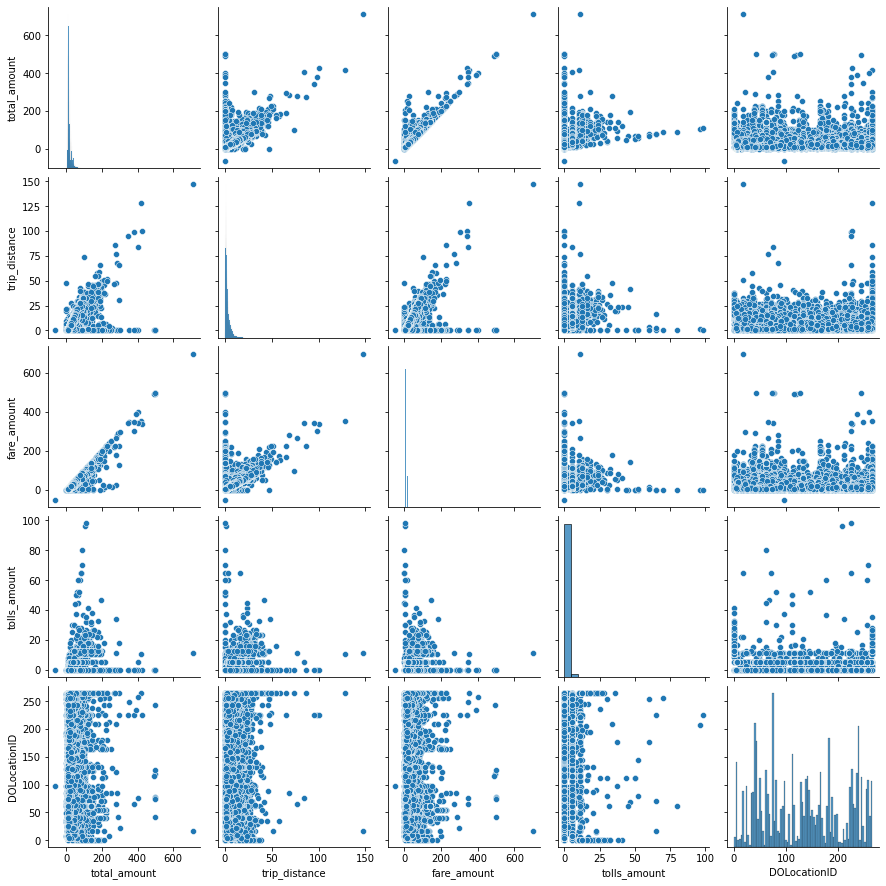

In [355]:
#Let's analyze the plots for some top correlated fields 
cols = ['total_amount', 'trip_distance', 'fare_amount', 'tolls_amount','DOLocationID']
sns.pairplot(green_tx[cols])

In [417]:
#Separating the target from predictors
green_tx.drop(['tip_amount'], axis=1, inplace=True)

In [418]:
# applying one hot encoding for categorical variables
gt_ml=pd.get_dummies(green_tx,columns=['store_and_fwd_flag','pickup_day','dropoff_day'])

In [419]:
# Verifying the final dataset before applying ML algirithm
pd.set_option('max_columns', 50)
gt_ml.sample(10)

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,tolls_amount,total_amount,trip_type,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday
24433,1,244,45,1,10.33,36.0,1.0,0.0,43.47,1,2.528000e-06,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1021705,1,244,238,1,4.14,16.0,0.5,0.0,19.03,1,1.083000e-06,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
617509,1,255,179,1,7.85,25.0,0.5,0.0,31.56,1,1.334000e-06,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1199605,1,226,7,1,2.14,9.5,0.0,0.0,13.79,1,5.830000e-07,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
855186,1,74,75,1,1.58,8.5,0.0,0.0,11.30,1,5.480000e-07,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
85060,1,25,61,1,2.80,12.0,0.5,0.0,15.95,1,8.310000e-07,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
840825,1,129,260,1,1.73,8.0,0.0,0.0,8.80,1,4.790000e-07,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1197335,1,42,41,1,0.69,5.0,0.0,0.0,5.80,1,2.930000e-07,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1159299,5,241,241,1,0.00,7.0,0.0,0.0,7.00,2,8.000000e-09,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1145690,1,97,97,1,0.60,4.0,0.0,0.0,4.80,1,1.260000e-07,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Model Selection and Evaluation

As it'a regression problem, we will first check linear regression with lasso to reduce multicollinearity issue as a penalized term. Additionally We will check the  xgboost regressor as well to compare the evaluation.For this assignment , RMSE will be treated as performance metrics.

In [421]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [425]:
# Split the dataset in train-test in 80-20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(gt_ml, Y_tip_orig, test_size=0.2, random_state=42)

In [426]:
# Checking size after spitting data
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((465468, 27), (465468,), (116367, 27), (116367,))

In [314]:
# 10 fold cross validation check to compare models
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(10,shuffle=True,random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [429]:
# Applying cross validation to evaluate both the models
ls = Lasso()
rmse_CV_train(ls)
print(f"RMSE for Lasso Regression:{rmse_CV_train(ls).mean()}")

print('-'*50)
print('-'*50)

xb = xgb.XGBRegressor()
rmse_CV_train(xb)
print(f"RMSE for XG Boosting Regression:{rmse_CV_train(xb).mean()}")


--------------------------------------------------
RMSE for Lasso Regression:1.2523872587018838
--------------------------------------------------
--------------------------------------------------
RMSE for XG Boosting Regression:0.46433688621418856


In [441]:
# Tuning lasso regression with hyperparameter to compare the performance metrics
lasso = Lasso()


lasso.set_params(normalize=False)
coefs_lasso  = []
scores = []

lasso.set_params(alpha=0.01)
lasso.fit(X_train,Y_train)
pred = lasso.predict(X_train)

print("R^2 for train set: %f" %lasso.score(X_train,Y_train))
print(f"Train RMSE: {np.sqrt(mean_squared_error(Y_train, pred))}")
print('-'*50)

lasso.set_params(alpha=0.01)
lasso.fit(X_test,Y_test)
pred = lasso.predict(X_test)

print("R^2 for test set: %f" %lasso.score(X_test,Y_test))
print(f"test RMSE: {np.sqrt(mean_squared_error(Y_test, pred))}")
print('-'*50)

R^2 for train set: 0.979162
Train RMSE: 0.3875538416806239
--------------------------------------------------
R^2 for test set: 0.981295
test RMSE: 0.38656965422660394
--------------------------------------------------


In [433]:
lassoCoef = pd.Series(lasso.coef_, index=X_train.columns)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
sortedCoefs

total_amount             0.965921
fare_amount              0.964512
tolls_amount             0.947914
extra                    0.852484
RatecodeID               0.171089
DOLocationID             0.000130
PULocationID             0.000032
store_and_fwd_flag_Y     0.000000
passenger_count          0.000000
trip_distance            0.000000
trip_type                0.000000
trip_duration            0.000000
store_and_fwd_flag_N     0.000000
dropoff_day_Wednesday    0.000000
dropoff_day_Tuesday      0.000000
pickup_day_Monday        0.000000
pickup_day_Saturday      0.000000
pickup_day_Sunday        0.000000
pickup_day_Thursday      0.000000
pickup_day_Tuesday       0.000000
pickup_day_Wednesday     0.000000
dropoff_day_Friday       0.000000
dropoff_day_Monday       0.000000
dropoff_day_Saturday     0.000000
dropoff_day_Sunday       0.000000
dropoff_day_Thursday     0.000000
pickup_day_Friday        0.000000
dtype: float64

Text(0.5, 1.0, 'Feature Importance Plot for lasso regression')

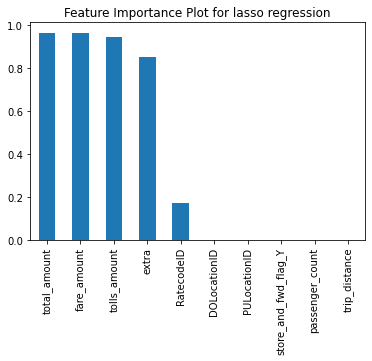

In [435]:
plt.figure(figsize = ((6, 4)))
#a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
sortedCoefs.head(10).plot.bar(x='feature_name',y='importance_score', legend=None, figsize = (6,4))
plt.title('Feature Importance Plot for lasso regression')

In [ ]:
# Applying Grid-Search for max-depth and n-estimator values
import xgboost as xgb
xg = xgb.XGBRegressor()

from sklearn.model_selection import GridSearchCV

params = {'max_depth':(3, 4, 5),'n_estimators':(100,500, 1000)}
gs = GridSearchCV(xg, params)
gs.fit(X_train,Y_train)


# print best parameter after tuning 
print(gs.best_params_) 

In [443]:
# Apply XGBoosting model on train/test data
import xgboost as xgb
xg = xgb.XGBRegressor()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train,Y_train)
pred = xg.predict(X_train)

print("R^2 for train set: %f" %xg.score(X_train,Y_train))
print(f"Train RMSE: {np.sqrt(mean_squared_error(Y_train, pred))}")
#lm.coef_
print('-'*50)

xg.fit(X_test,Y_test)
pred = xg.predict(X_test)

print("R^2 for test set: %f" %xg.score(X_test,Y_test))
print(f"test RMSE: {np.sqrt(mean_squared_error(Y_test, pred))}")
#lm.coef_
print('-'*50)

R^2 for train set: 0.973585
Train RMSE: 0.4363454465879168
--------------------------------------------------
R^2 for test set: 0.979288
test RMSE: 0.4067822925673627
--------------------------------------------------


In [445]:
sorted_importance = sorted(zip(X_train.columns, xg.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('total_amount', 0.3945366),
 ('fare_amount', 0.30484107),
 ('tolls_amount', 0.07349689),
 ('DOLocationID', 0.042715393),
 ('trip_duration', 0.029479427),
 ('trip_distance', 0.027122673),
 ('PULocationID', 0.026698926),
 ('passenger_count', 0.020973854),
 ('pickup_day_Wednesday', 0.017353289),
 ('extra', 0.015271425),
 ('pickup_day_Monday', 0.014174546),
 ('pickup_day_Friday', 0.010634306),
 ('pickup_day_Sunday', 0.005459696),
 ('trip_type', 0.0053877174),
 ('RatecodeID', 0.005160273),
 ('pickup_day_Saturday', 0.0035435394),
 ('pickup_day_Thursday', 0.00315038),
 ('store_and_fwd_flag_N', 0.0),
 ('store_and_fwd_flag_Y', 0.0),
 ('pickup_day_Tuesday', 0.0),
 ('dropoff_day_Friday', 0.0),
 ('dropoff_day_Monday', 0.0),
 ('dropoff_day_Saturday', 0.0),
 ('dropoff_day_Sunday', 0.0),
 ('dropoff_day_Thursday', 0.0),
 ('dropoff_day_Tuesday', 0.0),
 ('dropoff_day_Wednesday', 0.0)]

Text(0.5, 1.0, 'Feature Importance Plot for XG Boosting')

<Figure size 1080x576 with 0 Axes>

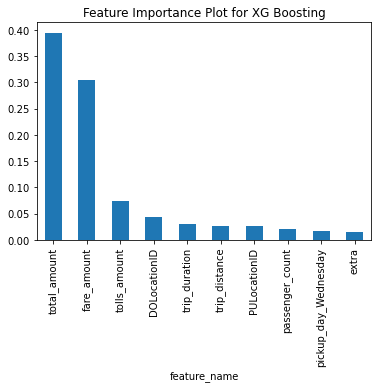

In [446]:
plt.figure(figsize = ((15, 8)))
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).head(10).plot.bar(x='feature_name',y='importance_score', legend=None, figsize = (6,4))
plt.title('Feature Importance Plot for XG Boosting')

XGBoost works best among the models in term of speed, RMSE, R^2 and feature importance standpoint.It's observed from model evaulation that total amount and fare amount are the most important factor to get the tip amount. The more the total and fare amounts are, the more tip amount should be ideally. So in terms of business stand-point, the trip distance should be a very important factor as well, as more distance means more fare amount. But sometimes there are many other driving factors to have the fare amount high like more time to reach a short distance due to traffic or climate. Will do detail analysis on the anomaly in the next section.

# Anomaly Detection

To figure out if there is any anomaly beteen trip distance and trip duration, I'll use scikit learn isolation Forest algorythm.

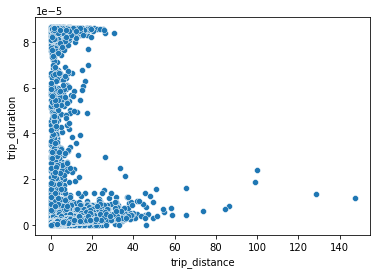

In [447]:
# Check visualization for scatter plot between distance and duration
sns.scatterplot(data=X_train, x="trip_distance", y="trip_duration")

The graph shows for many trips, though the distance is very small, it's taking huge time to complete the trip.

In [448]:
#Isolation Forest model used to find out anomaly and save it in a separate column
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state = 42, contamination = 0.01)
X_train['Anomaly'] = clf.fit_predict(X_train[['trip_distance', 'trip_duration']])
X_train.head()

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,tolls_amount,total_amount,trip_type,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,Anomaly
455527,1,7,237,1,4.09,27.5,0.0,0.0,33.96,1,2.728000e-06,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
934951,1,66,45,1,1.54,7.0,0.0,0.0,9.80,1,2.840000e-07,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
342620,1,42,74,1,2.26,10.5,0.0,0.0,13.56,1,7.850000e-07,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
143935,1,36,236,2,8.01,26.5,0.5,0.0,33.36,1,1.667000e-06,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
685936,1,260,7,1,1.39,7.5,0.0,0.0,12.33,1,4.680000e-07,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [456]:
#Value count shows 4643 datapoints are outliers which can impact model performance
X_train['Anomaly'].value_counts()

 1    460825
-1      4643
Name: Anomaly, dtype: int64

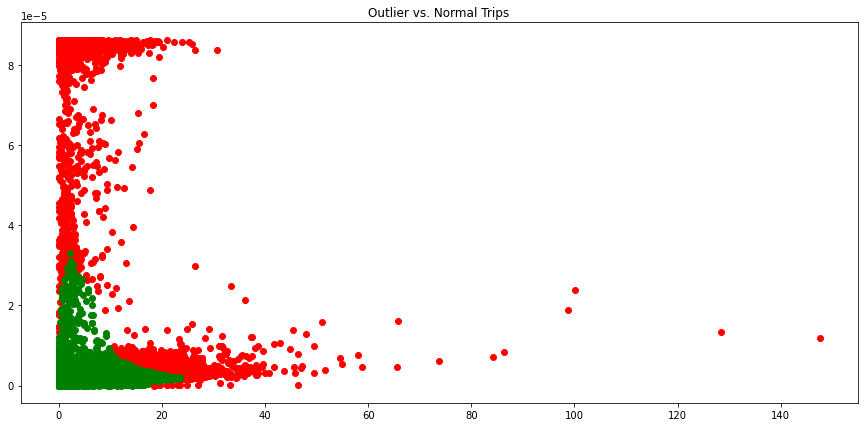

In [452]:
#Visualization for outlier vs normal trips
plt.title("Outlier vs. Normal Trips")
plt.rcParams['figure.figsize'] = [15, 7]

plt.scatter(X_train.loc[X_train.Anomaly == -1, ['trip_distance']], 
                 X_train.loc[X_train.Anomaly == -1, ['trip_duration']], c='red')
plt.scatter(X_train.loc[X_train.Anomaly == 1, ['trip_distance']], 
                 X_train.loc[X_train.Anomaly == 1, ['trip_duration']], c='green')
plt.show()

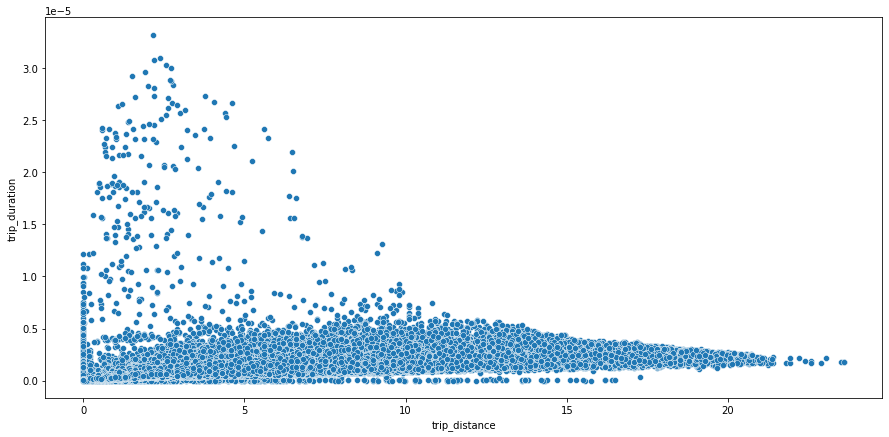

In [455]:
# here is the scatterplot of inlier data. Training this dataset will help to improve the RMSE much better as we are removing anolamy here.
X_train_new = X_train.loc[X_train['Anomaly'] == 1].copy()
sns.scatterplot(data=X_train_new, x="trip_distance", y="trip_duration")

# Conclusion

Based on above shown 5 steps here are some highlights on the dataset:
    1. Data Quality is average and in many scenario, data have been wrongly collected which create anomaly in pattern.
    2. The analysis reveals that the most trips happened on Saturday and Friday, whereas least trips happened on Monday.
    3. The anaysis direct that most trips happen in the evening and least trip happen in the morning.
    4. To find a pattern for better tip amount, taxi drivers will be mainly dependent on total amount and fare amount the  
       passengers are paying.
    5. Anomaly found between trip duration and trip distance. If the outliers can be removed, the model will perform better to 
       find pattern of best trips to get more tip amount.
    6. This assignment is done in 2 days with optimum solution. If more time can be spent, many other observations can be 
       analyzed in detail for future scope.     
       